In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Data/merged_data.csv')

In [3]:
# We can inspect which countries have the highest incoming and outgoing tourist traffic:
#   per dollar invested
#   per capita of population
# This will give us an idea of which countries are most efficient in attracting tourists and eliminate population and disposable income bias

def aggregareDF(df):
    # Population is listed per city so sum to get representative population for country
    # Mean of columns that are per country do not do any aggregation since all values are the same per country per row
    df = df.groupby(['Country Name', 'Year']).agg({"Arrivals in Millions":"mean","Departures in Millions":"mean","Population in Millions":"sum","Expenditures in Millions":"mean"})
    # Now average over years to get representative population for country
    df = df.groupby(['Country Name']).agg({"Arrivals in Millions":"mean","Departures in Millions":"mean","Population in Millions":"mean","Expenditures in Millions":"mean"})
    df['arrivals_per_dollar'] = df['Arrivals in Millions']/df['Expenditures in Millions']
    df['arrivals_per_capita'] = df['Arrivals in Millions']/df['Population in Millions']
    df['departures_per_dollar'] = df['Departures in Millions']/df['Expenditures in Millions']
    df['departures_per_capita'] = df['Departures in Millions']/df['Population in Millions']
    return df

selected_data = data.copy()

# Population includes only population from only the cities in the dataset
# Convert population and expenditure to more readable units
selected_data['Arrivals in Millions'] = selected_data['Number of Arrivals']/1000000
selected_data['Departures in Millions'] = selected_data['Number of Departures']/1000000
selected_data['Population in Millions'] = selected_data['population']/1000000
selected_data['Expenditures in Millions'] = selected_data['Expenditures']/1000000
selected_data.drop(['Number of Arrivals', 'population', 'Expenditures'], axis=1, inplace=True)

# Aggregate data
selected_data_agg = aggregareDF(selected_data)

# Print aggregated stats for dataset
print("Min stats")
print(selected_data_agg.idxmin())
print("\nMax stats")
print(selected_data_agg.idxmax())


Min stats
Arrivals in Millions             Paraguay
Departures in Millions            Iceland
Population in Millions            Morocco
Expenditures in Millions        Nicaragua
arrivals_per_dollar                Brazil
arrivals_per_capita         United States
departures_per_dollar            Portugal
departures_per_capita         Puerto Rico
dtype: object

Max stats
Arrivals in Millions               France
Departures in Millions            Germany
Population in Millions      United States
Expenditures in Millions    United States
arrivals_per_dollar                Greece
arrivals_per_capita          Saudi Arabia
departures_per_dollar             Algeria
departures_per_capita        Saudi Arabia
dtype: object


               Arrivals in Millions  Departures in Millions  \
Country Name                                                  
Brazil                     6.239333                9.616000   
Greece                    22.686500                6.093000   
Saudi Arabia              16.109000               21.146000   
United States             72.065581               71.681222   

               Population in Millions  Expenditures in Millions  \
Country Name                                                      
Brazil                       0.114407              25144.666667   
Greece                       0.009337               3653.000000   
Saudi Arabia                 0.001500              19065.000000   
United States               19.162062             144264.000000   

               arrivals_per_dollar  arrivals_per_capita  
Country Name                                             
Brazil                    0.000248            54.536528  
Greece                    0.006210          

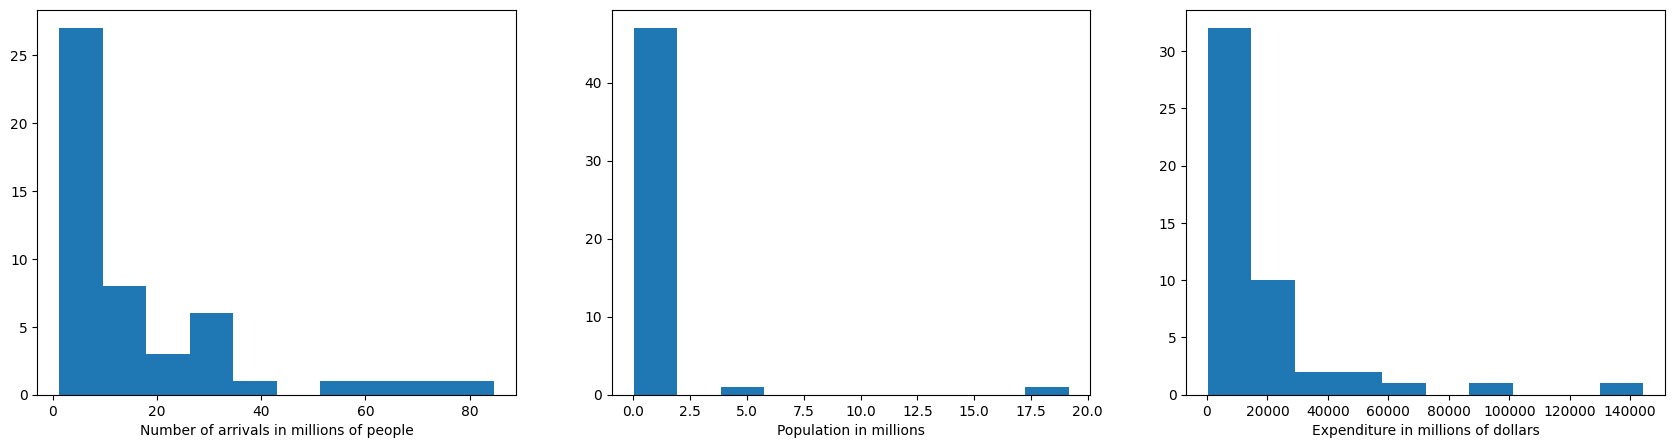

In [4]:
# We can examine the averages for Brazil, United States, Greece and Saudi Arabia
#   lowest: arrivals/$: Brazil, arrivals/capita: United States
#   highest: arrivals/$: Greece arrivals/capita: Saudi Arabia
countries = ['Brazil', 'United States', 'Greece', 'Saudi Arabia']

# Aggregare data for selected countries
selected_countries_agg = selected_data.copy()
selected_countries_agg = aggregareDF(selected_countries_agg[selected_countries_agg['Country Name'].isin(countries)]).drop(['departures_per_dollar', 'departures_per_capita'],axis=1)

# Print stats for 4 countries of interest
print(selected_countries_agg)

print("\nArrival quartiles:")
print(selected_data_agg['Arrivals in Millions'].quantile([0.25, 0.5, 0.75]))
print("\nPopulation quartiles:")
print(selected_data_agg['Population in Millions'].quantile([0.25, 0.5, 0.75]))
print("\nExpenditure quartiles:")
print(selected_data_agg['Expenditures in Millions'].quantile([0.25, 0.5, 0.75]))

# Plot a histogram of avergare stats to see where these 4 countries of interest lie with respect to rest of the world
# The histograms confirm the very skewed quartiles
plt.figure(figsize=(21, 5))

# Plot number of tourism arrivals
plt.subplot(1, 3, 1)
plt.hist(selected_data_agg['Arrivals in Millions'], bins=10)
plt.xlabel('Number of arrivals in millions of people')

# Plot population
plt.subplot(1, 3, 2)
plt.hist(selected_data_agg['Population in Millions'], bins=10)
plt.xlabel('Population in millions')

# Plot average tourism expenditure
plt.subplot(1, 3, 3)
plt.hist(selected_data_agg['Expenditures in Millions'], bins=10)
plt.xlabel('Expenditure in millions of dollars')

plt.show()
plt.close()

# Although France and Germany have the highest tourism arrival and departures respectively, they are not the most efficient in attracting tourists!

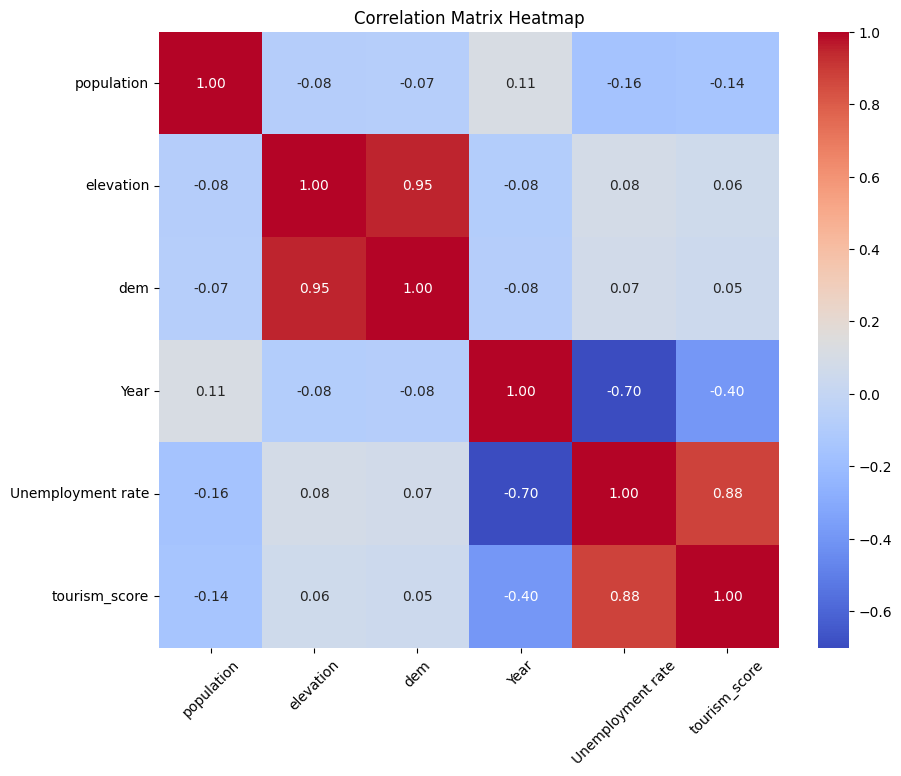

In [5]:
# Define the tourism_score metric
data['tourism_score'] = (data['Number of Arrivals'] + data['Number of Departures']) / data['Expenditures']

# Select features and target variable
data = data[['population', 'elevation', 'dem', 'Year', 'Unemployment rate', 'tourism_score']]

correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

RMS difference between `dem` and `elevation`:  113.58583325439636
       geoname_id           area_name feature_code   Country Name  population  \
3196      3165981        Taglio di Po        PPLA3          Italy        6848   
5610      3175248           Lagosanto        PPLA3          Italy        4026   
11396     4976528            Richmond          PPL  United States        1760   
18654     5108000       Barnum Island          PPL  United States        2414   
21601     4176277  Upper Grand Lagoon          PPL  United States       13963   
23082     4152513          Cudjoe Key          PPL  United States        1763   

       elevation                          coordinates          timezone  \
3196         0.0   {'lon': 12.21386, 'lat': 45.00189}       Europe/Rome   
5610         0.0   {'lon': 12.14005, 'lat': 44.76282}       Europe/Rome   
11396        0.0   {'lon': -69.79893, 'lat': 44.0873}  America/New_York   
18654        0.0  {'lon': -73.64402, 'lat': 40.60455}  America/New

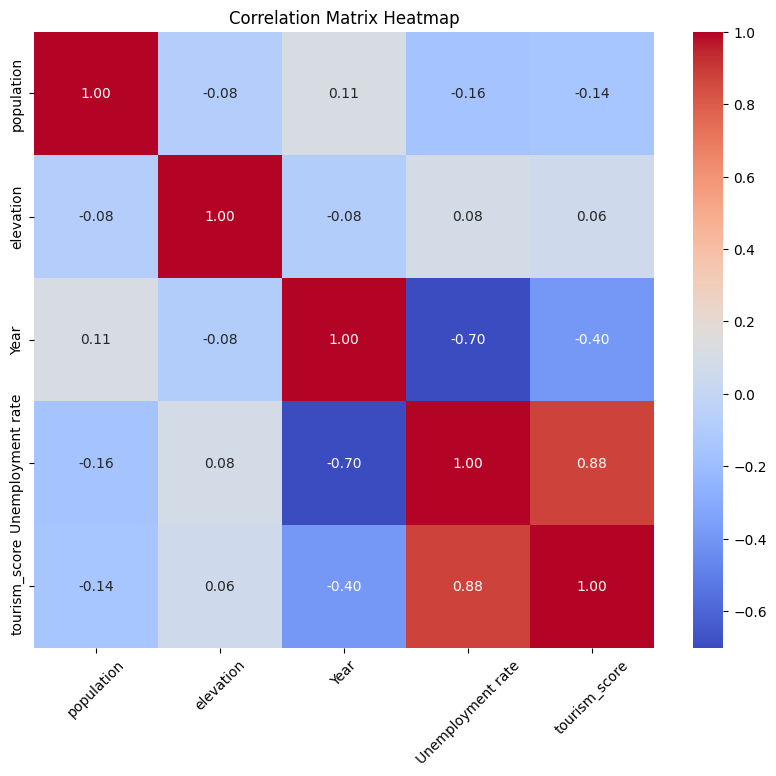

In [6]:
# dem and elevation are highly correlated. This is because they both encode elevation information
# So we should merge them into 1 column then redo our analysis
data = pd.read_csv('Data/merged_data.csv')

rms_diff = np.sqrt(np.mean((data['elevation'] - data['dem']) ** 2))
print("RMS difference between `dem` and `elevation`: ", rms_diff)

data['elevation'] = np.where((data['elevation'].notnull()) & (data['elevation'] != 0), data['elevation'], data['dem'])
data = data.drop(['dem'], axis=1)

# These regions actually have close to 0 elevation and are valid rows!
result = data[data['elevation'].isna() | data['elevation'] == 0]
print(result)

# Define the tourism_score metric
data['tourism_score'] = (data['Number of Arrivals'] + data['Number of Departures']) / data['Expenditures']

# Select features and target variable
data = data[['population', 'elevation', 'Year', 'Unemployment rate', 'tourism_score']]

# Look at correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
